In [1]:
#https://github.com/manashpratim/Big-Mart-Sales-Prediction/blob/master/Big_Mart_Sales_Prediction.ipynb

**Name: Sunita Pradhan**

**Domain: Sales & Marketing**

**Project: Stores Sales Prediction**

**Tech Stack: Python, Machine Learning**

--------------

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Loading data as dataframe
df1 = pd.read_csv("Train.csv")
df2= pd.read_csv("Test.csv")
pd.set_option('display.max_columns', None)

In [4]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
print('Shape of train data', df1.shape)
print('Shape of test data', df2.shape)

Shape of train data (8523, 12)
Shape of test data (5681, 11)


In [7]:
print('Columns of train data', df1.columns, '\n')
print('Columns of test data', df2.columns)

Columns of train data Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object') 

Columns of test data Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [8]:
#'Summary of train data'
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#'Summary of train data'
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#### Missing values

In [10]:
#Null value count of test data
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Null value count of test data
df2.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
#Checking whethere there is any duplicate value or not in train data
df1.duplicated().sum()

0

In [13]:
#Checking whethere there is any duplicate value or not in test data
df2.duplicated().sum()

0

In [14]:
#Creating copy of both dataframes
data1 = df1.copy()
data2 = df2.copy()

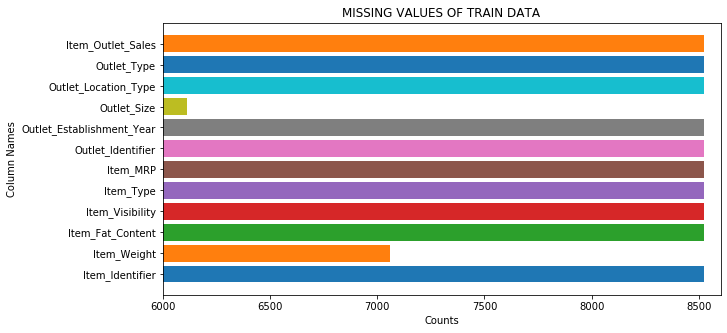

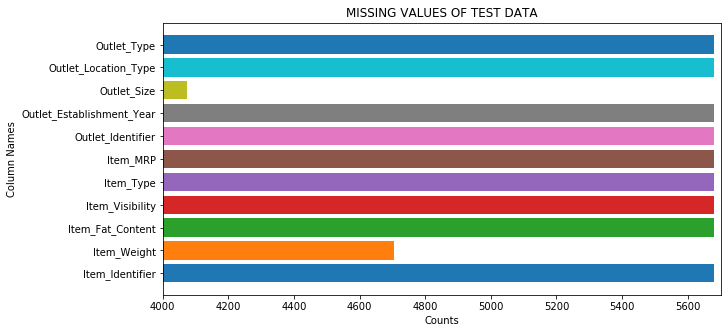

In [15]:
# For visualising missing values

def check_counts1():
    plt.figure(figsize=(10,5))
    plt.title('MISSING VALUES OF TRAIN DATA')
    for col in data1.columns:
        #print(data1[col].isnull().value_counts())
        plt.barh(col, data1[col].isnull().value_counts())
    # As there is 12 columns in data range given as 12
    plt.yticks(range(12), data1.columns)      
    plt.ylabel('Column Names')
    plt.xlabel('Counts')
    plt.xlim(6000, 8600)
    plt.show()
    
def check_counts2():
    plt.figure(figsize=(10,5))
    plt.title('MISSING VALUES OF TEST DATA')
    for col in data2.columns:
        #print(data2[col].isnull().value_counts())
        plt.barh(col, data2[col].isnull().value_counts())
    # As there is 11 columns in data range given as 11
    plt.yticks(range(11), data2.columns)      
    plt.ylabel('Column Names')
    plt.xlabel('Counts')
    plt.xlim(4000, 5700)
    plt.show()
    
check_counts1()
check_counts2()

In [16]:
data1.Item_Weight.unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [17]:
data2.Outlet_Size.unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

#### Filling missing values

In [18]:
#Filling the Null values in 'Item_Weight' column with the average weight 
data1['Item_Weight'].fillna(value=data1['Item_Weight'].mean(),inplace=True)
data2['Item_Weight'].fillna(value=data2['Item_Weight'].mean(),inplace=True)

#Filling the Null values in 'Outlet_Size' column with "Unknown" as it's a categorical column
data1['Outlet_Size'].fillna(value='Unknown',inplace=True)
data2['Outlet_Size'].fillna(value='Unknown',inplace=True)

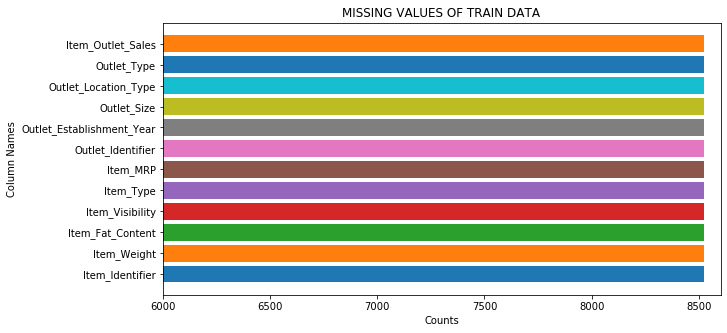

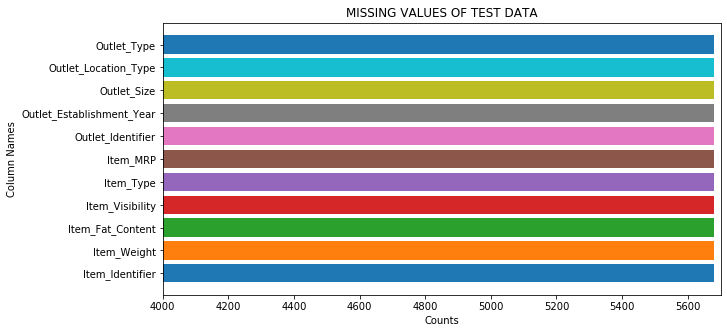

In [19]:
# After filling missing values
check_counts1()
check_counts2()

In [20]:
data1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
data1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
# For checking unique values
data1.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [23]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Value count of items in train data
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 



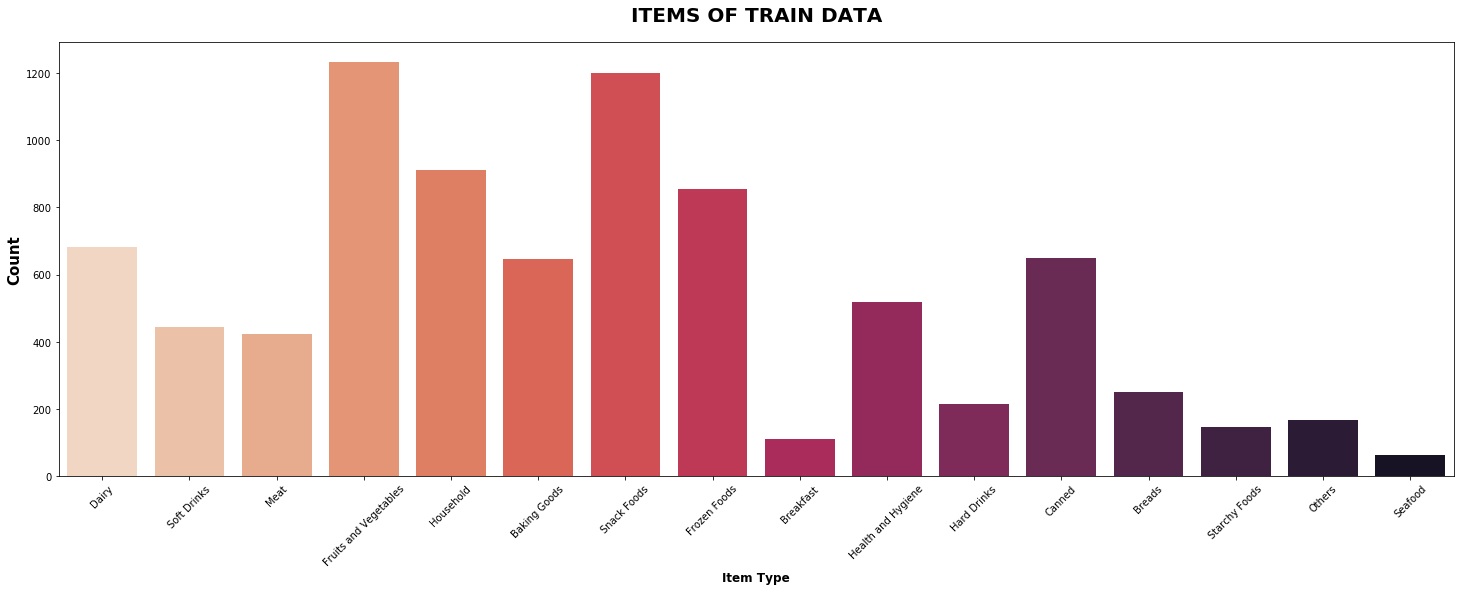

Value count of items in test data
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


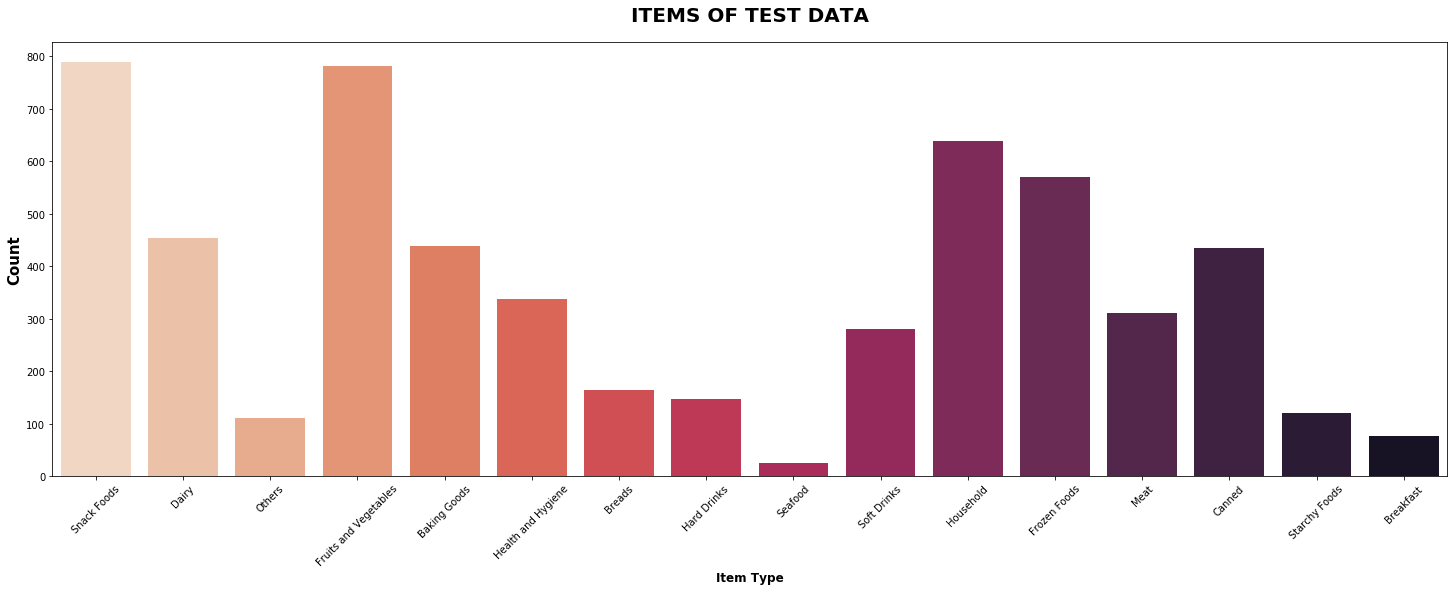

In [24]:
#Counting and visualizing the no.of items present in Item_type of train data
def item_type1():
    print('Value count of items in train data')
    print(data1.Item_Type.value_counts())
    
    plt.subplots(figsize=(25,8))
    sns.countplot(x='Item_Type', data=data1,palette="rocket_r")
    plt.title("ITEMS OF TRAIN DATA", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel("Item Type", weight="bold", fontsize=12)
    plt.xticks(rotation= 45)
    plt.show() 
#     plt.figure(figsize=(25,8))
#     plt.title("ITEMS OF TEST DATA", weight="bold",fontsize=20, pad=20)
#     sns.countplot(data= data1,x='Item_Type')
#     plt.ylabel('Counts',fontsize=16)
#     plt.xlabel('Item_Type',fontsize=16)

#Counting and visualizing the no.of items present in Item_type of test data
def item_type2():
    print('Value count of items in test data')
    print(data2.Item_Type.value_counts())
    
    plt.subplots(figsize=(25,8))
    sns.countplot(x='Item_Type', data=data2,palette="rocket")
    plt.title("ITEMS OF TEST DATA", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel("Item Type", weight="bold", fontsize=12)
    plt.xticks(rotation= 45)
    plt.show()
#     plt.figure(figsize=(25,8))
#     plt.title("ITEMS OF TEST DATA", weight="bold",fontsize=20, pad=20)
#     sns.countplot(data= data2,x='Item_Type')
#     plt.ylabel('Counts',fontsize=16)
#     plt.xlabel('Item_Type',fontsize=16)
    
item_type1()
item_type2()

From the above we can observe that in item type there are some non consumable items are present.


If we notice from dataset, Item_Identifier and Item_Type are related to each other. First two latters of Item_Identifier are define the type of item present in Item_Type column.

In [25]:
data1[['Item_Identifier','Item_Type']].head()

,Item_Identifier,Item_Type
0,FDA15,Dairy
1,DRC01,Soft Drinks
2,FDN15,Meat
3,FDX07,Fruits and Vegetables
4,NCD19,Household


In [26]:
data2[['Item_Identifier','Item_Type']].head()

,Item_Identifier,Item_Type
0,FDW58,Snack Foods
1,FDW14,Dairy
2,NCN55,Others
3,FDQ58,Snack Foods
4,FDY38,Dairy


In [27]:
# Let's categorize 'Item_Type' into 'Non consumables', 'Drinks' and 'Foods' according to the 'Item_Identifier'
def item_type(cols):
    item_id=cols[0]
    item_type=cols[1]

    if item_id[:2] == 'NC':
        return 'Non-Consumable'
    elif item_id[:2] == 'DR':
        return 'Drinks'
    else:
        return 'Foods'

In [28]:

data1['Item_Type']=data1[['Item_Identifier','Item_Type']].apply(item_type,axis=1)
data2['Item_Type']=data2[['Item_Identifier','Item_Type']].apply(item_type,axis=1)

Value count of items in train data
Foods             6125
Non-Consumable    1599
Drinks             799
Name: Item_Type, dtype: int64 



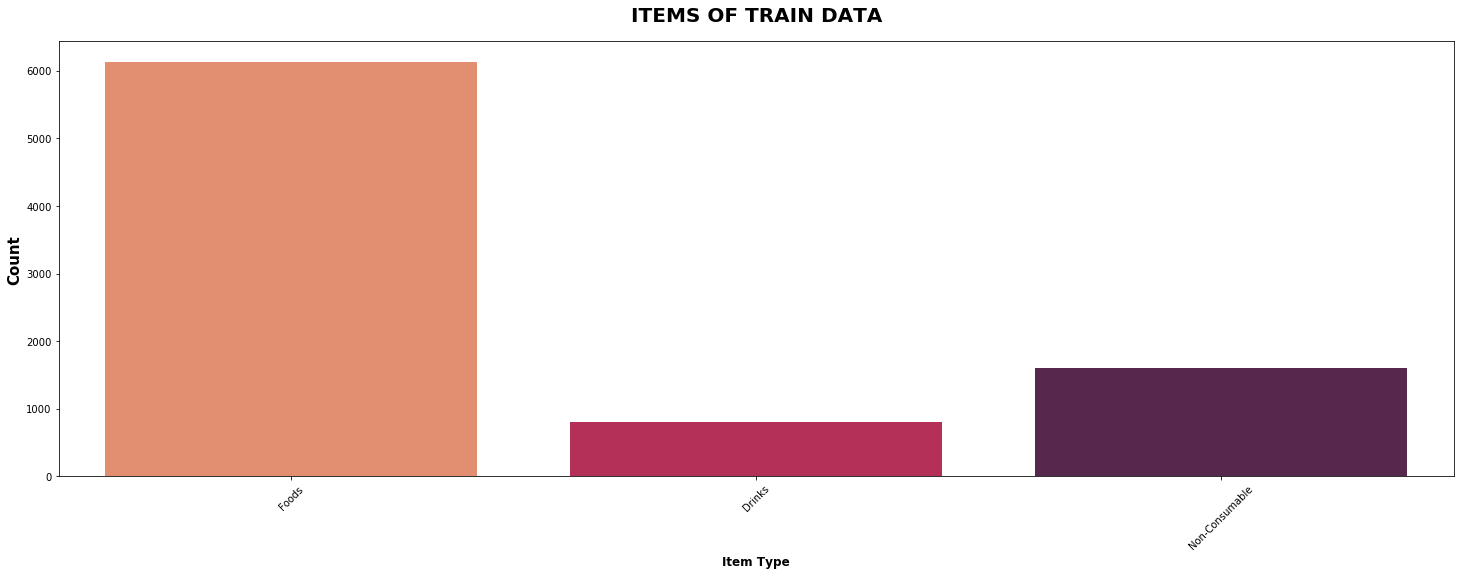

Value count of items in test data
Foods             4076
Non-Consumable    1087
Drinks             518
Name: Item_Type, dtype: int64


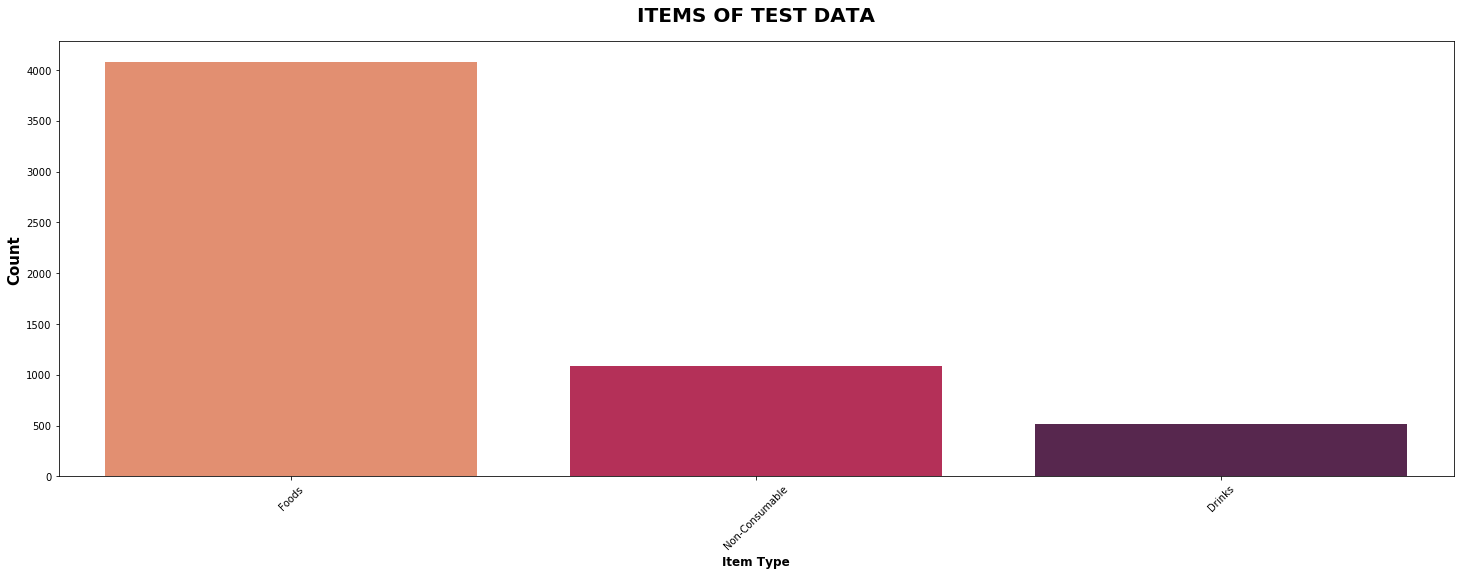

In [29]:
#After changing
item_type1()
item_type2()

In [30]:
data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Foods,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Foods,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Foods,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Foods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Non-Consumable,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [31]:
data1.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [32]:
data1[['Item_Fat_Content','Item_Type']].head()

,Item_Fat_Content,Item_Type
0,Low Fat,Foods
1,Regular,Drinks
2,Low Fat,Foods
3,Regular,Foods
4,Low Fat,Non-Consumable


We can see for Non-Consumable items it shows low fat or regular. So we can replace it by non-edible.

In [33]:
def item_fat(a):
    fat=a[0]
    i_type=a[1]
    
    if (fat=='Low Fat' or fat=='LF' or fat=='low fat') and (i_type=='Foods' or i_type=='Drinks'):
        return 'Low Fat'
    elif (fat=='Regular' or fat=='reg') and (i_type=='Foods' or i_type=='Drinks'):
        return 'Regular'
    else:
        return 'Non-Edible'

In [34]:
data1['Item_Fat_Content']=data1[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)
data2['Item_Fat_Content']=data2[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)

In [35]:
data1.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'Non-Edible'], dtype=object)

Value count of items in train data
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64


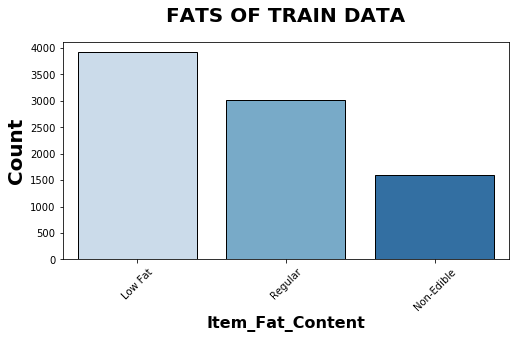

Value count of items in test data
Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64


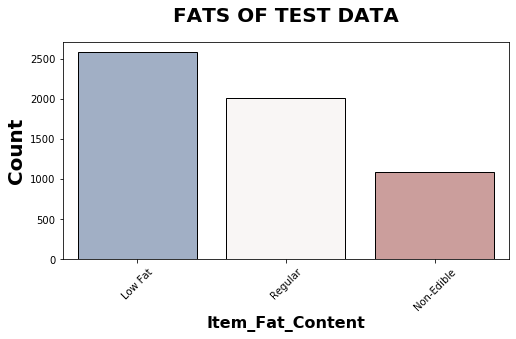

In [87]:
#Counting and visualizing the Item_Fat_Content of train data
def item_fat1():
    print('Value count of items in train data')
    print(data1.Item_Fat_Content.value_counts())
    
    plt.subplots(figsize=(8,4))
    sns.countplot(x="Item_Fat_Content", data=data1,ec = "black",palette="Blues",order = data1['Item_Fat_Content'].value_counts().index)
    plt.title("FATS OF TRAIN DATA", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=20)
    plt.xlabel("Item_Fat_Content", weight="bold", fontsize=16)
    plt.xticks(rotation= 45)
    plt.show()

#Counting and visualizing the Item_Fat_Content of test data
def item_fat2():
    print('Value count of items in test data')
    print(data2.Item_Fat_Content.value_counts())
    
    plt.subplots(figsize=(8,4))
    sns.countplot(x="Item_Fat_Content", data=data2,ec = "black",palette="vlag",order = data2['Item_Fat_Content'].value_counts().index)
    plt.title("FATS OF TEST DATA", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=20)
    plt.xlabel("Item_Fat_Content", weight="bold", fontsize=16)
    plt.xticks(rotation= 45)
    plt.show()
     
item_fat1()
item_fat2()

In [42]:
data1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non-Edible'], dtype=object)

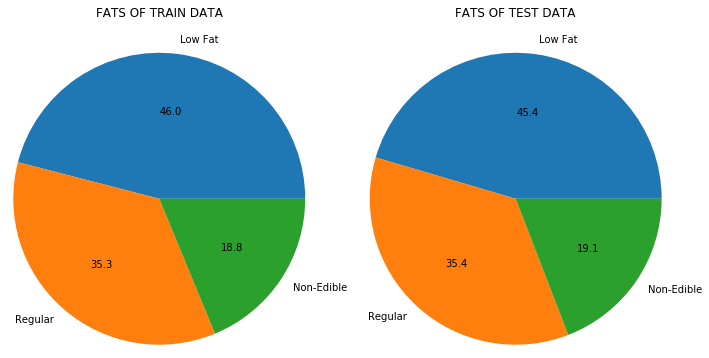

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# ax[0] = fig.add_axes([0, 0, .5, .5], aspect=1)
ax[0].pie(data1['Item_Fat_Content'].value_counts(), radius = 1.2, autopct='%1.1f', labels=data1['Item_Fat_Content'].unique())
# ax[1] = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax[1].pie(data2['Item_Fat_Content'].value_counts(), radius = 1.2, autopct='%1.1f', labels=data2['Item_Fat_Content'].unique())
ax[0].set_title('FATS OF TRAIN DATA', pad=30)
ax[1].set_title('FATS OF TEST DATA', pad=30)
fig.tight_layout()
plt.show()

In [38]:
data1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [39]:
data1.Item_Visibility.value_counts().head(9)

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
Name: Item_Visibility, dtype: int64

In [40]:
data2.Item_Visibility.value_counts().head(9)

0.000000    353
0.107493      2
0.159518      2
0.026711      2
0.056306      2
0.059067      2
0.052059      2
0.058132      2
0.079930      2
Name: Item_Visibility, dtype: int64

The column 'Item_Visibility' has lots of 0 values. In train data there are 526, 0 values and in test data there are 353 0 values. So these are also null values.
Let's fill this values with the mean value

In [41]:
#data['Item_Visibility'] = data['Item_Visibility'].replace('0.000000', nan)

In [42]:
data1['Item_Visibility'].mask(data1['Item_Visibility']== 0,data1['Item_Visibility'].mean(),inplace=True)
data2['Item_Visibility'].mask(data2['Item_Visibility']== 0,data2['Item_Visibility'].mean(),inplace=True)

In [43]:
data1.Item_Visibility.value_counts().head(9)

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
0.076792      2
0.061425      2
0.023466      2
0.112399      2
Name: Item_Visibility, dtype: int64

In [71]:
data1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [72]:
data2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


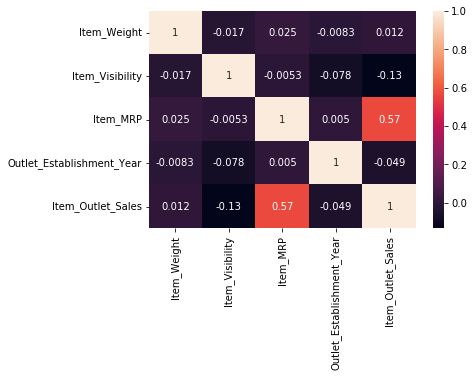

In [59]:
sns.heatmap(data1.corr(),annot=True)

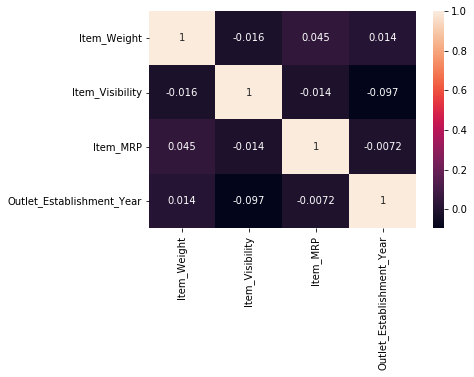

In [70]:
sns.heatmap(data2.corr(),annot=True)

Value count of items in train data
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


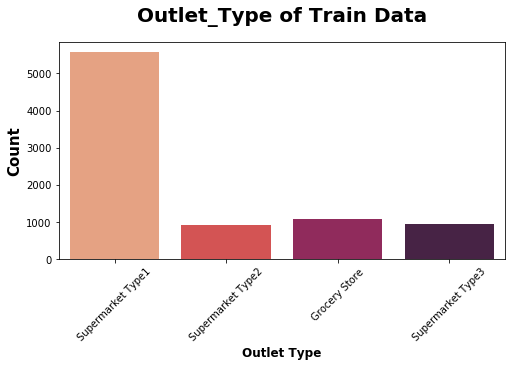

Value count of items in test data
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64


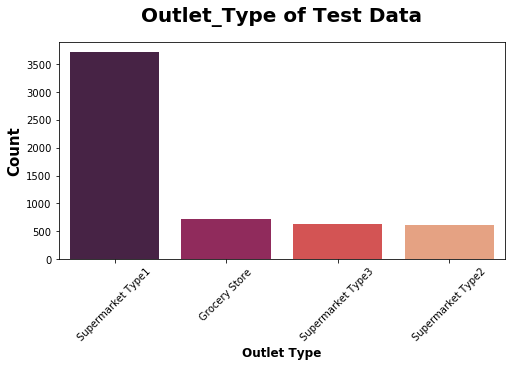

In [86]:
#Counting and visualizing the outlet_type of train data
def outlet_type1():
    print('Value count of items in train data')
    print(data1.Outlet_Type.value_counts())
    
    plt.subplots(figsize=(8,4))
    sns.countplot(x='Outlet_Type', data=data1,palette="rocket_r")
    plt.title("Outlet_Type of Train Data", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel("Outlet Type", weight="bold", fontsize=12)
    plt.xticks(rotation= 45)
    plt.show() 

#Counting and visualizing the outlet_type of test data
def outlet_type2():
    print('Value count of items in test data')
    print(data2.Outlet_Type.value_counts())
    
    plt.subplots(figsize=(8,4))
    sns.countplot(x='Outlet_Type', data=data2,palette="rocket")
    plt.title("Outlet_Type of Test Data", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel("Outlet Type", weight="bold", fontsize=12)
    plt.xticks(rotation= 45)
    plt.show() 
     
outlet_type1()
outlet_type2()

Value count of items in train data
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


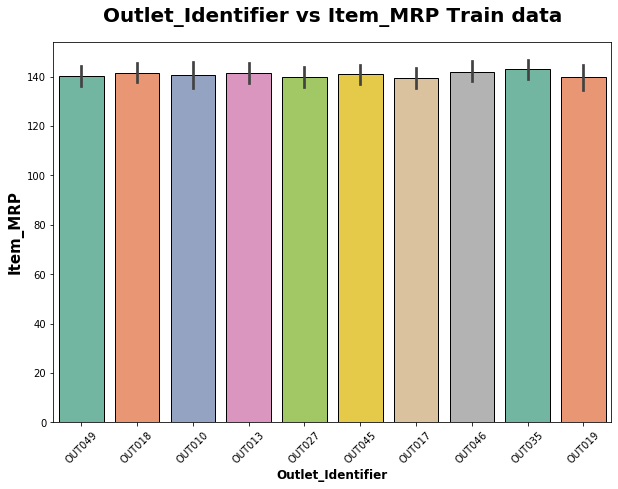

Value count of items in test data
OUT027    624
OUT013    621
OUT049    620
OUT035    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64


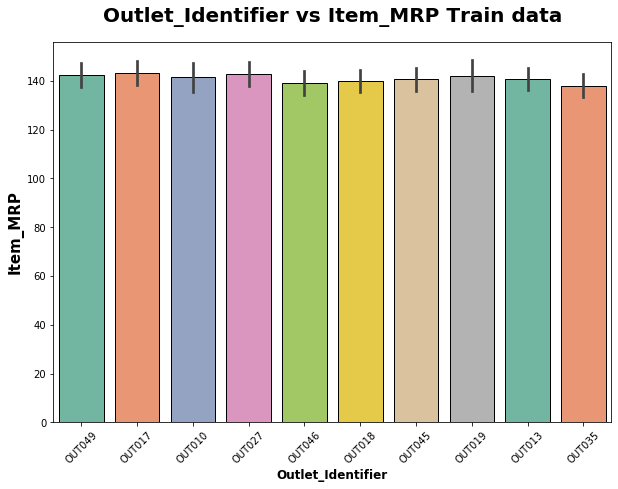

In [85]:
#Counting and visualizing the Outlet_Identifier of train data
def Outlet_Identifier1():
    print('Value count of items in train data')
    print(data1.Outlet_Identifier.value_counts())
    
    plt.subplots(figsize=(10,7))
    sns.barplot(x=data1.Outlet_Identifier, y=data1.Item_MRP, ec = "black", palette="Set2")
    plt.title("Outlet_Identifier vs Item_MRP Train data", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Item_MRP", weight="bold", fontsize=15)
    plt.xlabel("Outlet_Identifier", weight="bold", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

#Counting and visualizing the Outlet_Identifier of test data
def Outlet_Identifier2():
    print('Value count of items in test data')
    print(data2.Outlet_Identifier.value_counts())
    
    plt.subplots(figsize=(10,7))
    sns.barplot(x=data2.Outlet_Identifier, y=data2.Item_MRP, ec = "black", palette="Set2")
    plt.title("Outlet_Identifier vs Item_MRP Train data", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Item_MRP", weight="bold", fontsize=15)
    plt.xlabel("Outlet_Identifier", weight="bold", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
     
Outlet_Identifier1()
Outlet_Identifier2()

Value count of items in train data
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


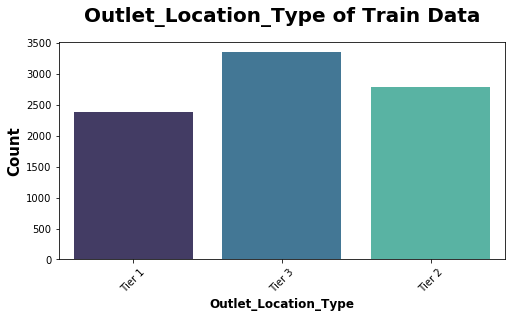

Value count of items in test data
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64


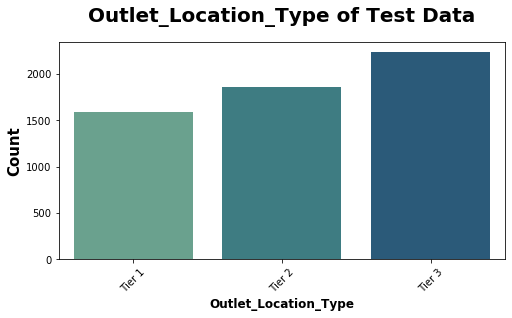

In [83]:
#Counting and visualizing the Outlet_Location_Type of train data
def Outlet_Location_Type1():
    print('Value count of items in train data')
    print(data1.Outlet_Location_Type.value_counts())
    
    plt.subplots(figsize=(8,4))
    sns.countplot(x='Outlet_Location_Type', data=data1,palette="mako")
    plt.title("Outlet_Location_Type of Train Data", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel("Outlet_Location_Type", weight="bold", fontsize=12)
    plt.xticks(rotation= 45)
    plt.show() 

#Counting and visualizing the Outlet_Location_Type of test data
def Outlet_Location_Type2():
    print('Value count of items in test data')
    print(data2.Outlet_Location_Type.value_counts())
    
    plt.subplots(figsize=(8,4))
    sns.countplot(x='Outlet_Location_Type', data=data2,palette="crest")
    plt.title("Outlet_Location_Type of Test Data", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel("Outlet_Location_Type", weight="bold", fontsize=12)
    plt.xticks(rotation= 45)
    plt.show() 
     
Outlet_Location_Type1()
Outlet_Location_Type2()

Value count of items in train data
Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


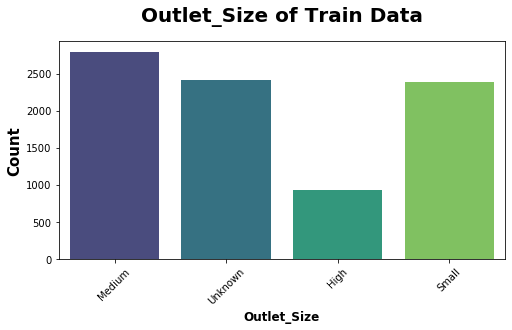

Value count of items in test data
Medium     1862
Unknown    1606
Small      1592
High        621
Name: Outlet_Size, dtype: int64


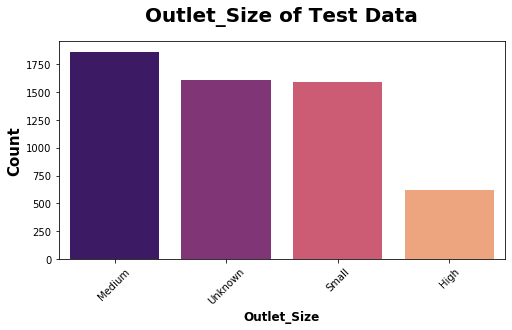

In [84]:
#Counting and visualizing the Outlet_Size of train data
def Outlet_Size1():
    print('Value count of items in train data')
    print(data1.Outlet_Size.value_counts())
    
    plt.subplots(figsize=(8,4))
    sns.countplot(x='Outlet_Size', data=data1,palette='viridis')
    plt.title("Outlet_Size of Train Data", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel("Outlet_Size", weight="bold", fontsize=12)
    plt.xticks(rotation= 45)
    plt.show() 

#Counting and visualizing the Outlet_Size of test data
def Outlet_Size2():
    print('Value count of items in test data')
    print(data2.Outlet_Size.value_counts())
    
    plt.subplots(figsize=(8,4))
    sns.countplot(x='Outlet_Size', data=data2, palette='magma')
    plt.title("Outlet_Size of Test Data", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=15)
    plt.xlabel("Outlet_Size", weight="bold", fontsize=12)
    plt.xticks(rotation= 45)
    plt.show() 
     
Outlet_Size1()
Outlet_Size2()

In [44]:
data1.to_csv('Cleaned Train.csv', index=False)
data2.to_csv('Cleaned Test.csv', index=False)